In [3]:
import pandas as pd

In [2]:
# Step 1: Create dummy data
data = {
    "Maths":[95,88,92,70,68,75,45,50,40,60],
    "Science":[90,85,94,72,65,78,50,55,42,58],
    "English":[60,65,62,80,82,75,88,84,90,70],
    "Hindi":[58,63,60,78,85,72,90,82,88,68]
}

In [4]:
df = pd.DataFrame(data)
print(df)

   Maths  Science  English  Hindi
0     95       90       60     58
1     88       85       65     63
2     92       94       62     60
3     70       72       80     78
4     68       65       82     85
5     75       78       75     72
6     45       50       88     90
7     50       55       84     82
8     40       42       90     88
9     60       58       70     68


In [ ]:
#Display covariance matrix
print("\n Covariance matrix: \n",df.cov())


 Covariance matrix: 
               Maths     Science     English       Hindi
Maths    384.233333  343.255556 -194.422222 -205.688889
Science  343.255556  314.988889 -170.600000 -182.177778
English -194.422222 -170.600000  118.266667  127.400000
Hindi   -205.688889 -182.177778  127.400000  140.488889


In [8]:
#Add a "result" columns

df['Result'] = (((df['Maths'] >= 60) | (df['Science'] >= 60)) & ((df['English'] >= 60) | (df['Hindi'] >= 60))).astype(int)
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Maths    10 non-null     int64
 1   Science  10 non-null     int64
 2   English  10 non-null     int64
 3   Hindi    10 non-null     int64
 4   Result   10 non-null     int64
dtypes: int64(5)
memory usage: 532.0 bytes
None
   Maths  Science  English  Hindi  Result
0     95       90       60     58       1
1     88       85       65     63       1
2     92       94       62     60       1
3     70       72       80     78       1
4     68       65       82     85       1
5     75       78       75     72       1
6     45       50       88     90       0
7     50       55       84     82       0
8     40       42       90     88       0
9     60       58       70     68       1


In [9]:
#Save to CSV
df.to_csv('student_marks.csv', index = False)

In [15]:
# 2 PCA + Logistic Regression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [11]:
numerical_cols = ['Maths', 'Science', 'English', 'Hindi']

In [12]:
# 3.Handling missing values
imputer = SimpleImputer(strategy = 'mean')
data_imputed = imputer.fit_transform(df[numerical_cols])
data_clean = pd.DataFrame(data_imputed, columns = numerical_cols)


In [13]:
# 4. Standardize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

In [14]:
# 5. Apply PCA
pca = PCA(n_components=4)
data_pca = pca.fit_transform(data_scaled)

In [16]:
# 6. Explained variance
explained_variance = pca.explained_variance_ratio_
cummulative_variance = np.cumsum(explained_variance)

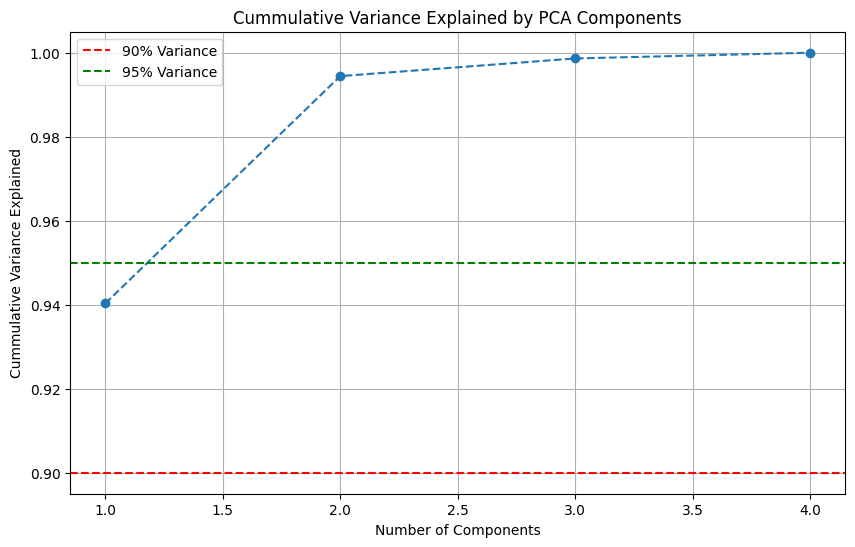

In [ ]:
# 7. Plot cummulative variance
plt.figure(figsize = (10,6))
plt.plot(range(1,len(cummulative_variance)+1), cummulative_variance, marker = 'o', linestyle = '--')
plt.title("Cummulative Variance Explained by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel('Cummulative Variance Explained')
plt.axhline(y = 0.9, color = 'r', linestyle = '--', label= "90% Variance")
plt.axhline(y = 0.95, color = 'g', linestyle = '--', label= "95% Variance")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
print("\nExplained Variance Ratio: ")
print(explained_variance.round(3))


Explained Variance Ratio: 
[0.94  0.054 0.004 0.001]


In [21]:
print("\nCummulative Variance: ")
print(cummulative_variance.round(3))


Cummulative Variance: 
[0.94  0.994 0.999 1.   ]


In [22]:
# 9. Feature Loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns = [f'PC{i+1}' for i in range(pca.n_components_)],
    index = numerical_cols
)

print("\nFeature Loadings: ")
print(loadings.round(3))


Feature Loadings: 
           PC1    PC2    PC3    PC4
Maths   -0.503  0.440  0.535  0.517
Science -0.497  0.554 -0.529 -0.408
English  0.503  0.444 -0.457  0.584
Hindi    0.497  0.550  0.474 -0.475


In [23]:
# 10 Logistic Regression on PCA - Reduced Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
# find minimum numbe of components for 95% variance
index_of_95 = np.argmax(cummulative_variance >= 0.95)
if cummulative_variance[index_of_95]>=0.95:
    n_opt = index_of_95+1
else:
    n_opt = len(explained_variance)

print(f"\nOptimal number of PCA Variance components (>=95% variance) : {n_opt}")


Optimal number of PCA Variance components (>=95% variance) : 2


In [26]:
#Reduced PCA features
x_pca_reduced = data_pca[:,:n_opt]
y = df['Result']

In [27]:
#Train Test Split
x_train,x_test, y_train, y_test = train_test_split(x_pca_reduced, y, test_size=0.3, random_state=42, stratify = y)